# Exoplanet Watch API

Learn how to explore the light curves, model fits and planetary ephemerides from EW using python programming. 

- Download light curve parameters, errors, posteriors or the raw data and fit it yourself
- O-C plots with data curated from the NASA Exoplanet Archive and Exoplanet Watch
- Over 100 targets with light curve data

The results are hosted here: https://exoplanets.nasa.gov/exoplanet-watch/results/

In [1]:
from exotic.api.ew import ExoplanetWatch
from IPython.display import display, Image

# This will load the results JSON from the link above
EW = ExoplanetWatch()
print(EW.target_list)

Loaded 120 targets
['CoRoT-2 b', 'CoRoT-8 b', 'HAT-P-11 b', 'HAT-P-12 b', 'HAT-P-16 b', 'HAT-P-18 b', 'HAT-P-19 b', 'HAT-P-1 b', 'HAT-P-20 b', 'HAT-P-23 b', 'HAT-P-25 b', 'HAT-P-27 b', 'HAT-P-28 b', 'HAT-P-32 b', 'HAT-P-36 b', 'HAT-P-37 b', 'HAT-P-3 b', 'HAT-P-41 b', 'HAT-P-44 b', 'HAT-P-49 b', 'HAT-P-52 b', 'HAT-P-53 b', 'HAT-P-55 b', 'HAT-P-56 b', 'HAT-P-5 b', 'HAT-P-6 b', 'HAT-P-7 b', 'HAT-P-8 b', 'HATS-18 b', 'HATS-24 b', 'HATS-33 b', 'HD 149026 b', 'HD 189733 b', 'K2-137 b', 'K2-216 b', 'K2-30 b', 'KELT-16 b', 'KELT-1 b', 'KELT-21 b', 'KELT-23 A b', 'KELT-3 b', 'KELT-4 A b', 'KELT-7 b', 'KELT-8 b', 'Kepler-1086 b', 'Kepler-1650 b', 'Kepler-412 b', 'Kepler-426 b', 'Kepler-43 b', 'Kepler-446 b', 'Kepler-446 c', 'Kepler-447 b', 'Kepler-495 b', 'Kepler-673 b', 'Kepler-685 b', 'Kepler-693 b', 'Kepler-695 b', 'Kepler-702 b', 'Kepler-718 b', 'Kepler-74 b', 'Kepler-76 b', 'Kepler-77 b', 'Kepler-854 b', 'KPS-1 b', 'Qatar-10 b', 'Qatar-1 b', 'Qatar-2 b', 'Qatar-4 b', 'Qatar-5 b', 'Qatar-7 b

## Query for a given target

The command `get` will fetch priors, light curves and an ephemeris (O-C) for each target.

In [2]:
# names are case and space sensitive
result = EW.get('WASP-33 b')

# list the result properties
result.__dict__.keys()

dict_keys(['raw_result', 'host', 'name', 'priors', 'timestamp', 'identifier', 'reduction_count', 'observation_count', 'ephemeris', 'observations'])

## Priors
A list of stellar and planetary parameters with references. These are used to calculate a light curve model with non-linear limb darkening.

In [3]:
result.priors

{'R*': {'units': 'Sol',
  'value': '1.44',
  'reference': 'Chakrabarty &amp; Sengupta 2019',
  'uncertainty': '0.03'},
 'RA': {'units': 'decimal',
  'value': '36.7127375',
  'reference': None,
  'uncertainty': None},
 'T*': {'units': 'K',
  'value': '7430.0',
  'reference': 'Chakrabarty &amp; Sengupta 2019',
  'uncertainty': '100.0'},
 'Tc': {'units': 'BJD-UTC',
  'value': '2454163.22367',
  'reference': 'Zhang et al. 2018',
  'uncertainty': '0.00022'},
 'DEC': {'units': 'decimal',
  'value': '37.5504441',
  'reference': None,
  'uncertainty': None},
 'ecc': {'units': None,
  'value': '0.0',
  'reference': 'Stassun et al. 2017',
  'uncertainty': None},
 'inc': {'units': 'deg',
  'value': '86.63',
  'reference': 'Chakrabarty &amp; Sengupta 2019',
  'uncertainty': '0.03'},
 'FE/H': {'units': None,
  'value': '0.1',
  'reference': 'Zhang et al. 2018',
  'uncertainty': '0.1'},
 'LOGG': {'units': 'Log10(cgs)',
  'value': '4.3',
  'reference': 'Zhang et al. 2018',
  'uncertainty': '0.1'},
 '

## Observations

Each observation is fit with a light curve model. For more information on how the light curve is fit please see: https://github.com/rzellem/EXOTIC/blob/main/exotic/api/elca.py#L602

In [4]:
len(result.observations)

1

In [5]:
# list the properties
print(result.observations[0].__dict__.keys())

dict_keys(['raw_observation', 'name', 'files', 'filter', 'obscode', 'identifier', 'secondary_obscodes', 'errors', 'parameters', 'lightcurve_url', 'posterior_url'])


In [6]:
# print the best-fit parameters
result.observations[0].parameters

{'u0': 2.073012980972075,
 'u1': -3.6066268399883867,
 'u2': 4.0864060212794415,
 'u3': -1.5527921622631298,
 'ecc': 0.0,
 'inc': 86.63,
 'omega': 0.0,
 'duration': 0.1217,
 'tmid': 2458154.6416,
 'a1': 3.65,
 'a2': -0.0052,
 'ars': 3.584,
 'rprs': 0.1237,
 'per': 1.21987}

In [7]:
# show the light curve
display(Image(url=result.observations[0].lightcurve_url))

# Download the light curve data

In [8]:
time, flux, fluxerr, airmass, airmasscorr = result.observations[0].get_data()

Text(0, 0.5, 'Rel. Flux')

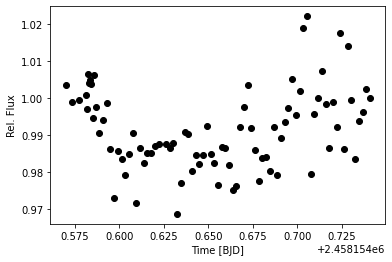

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(time, flux/airmasscorr, 'ko')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

Text(0, 0.5, 'Rel. Flux')

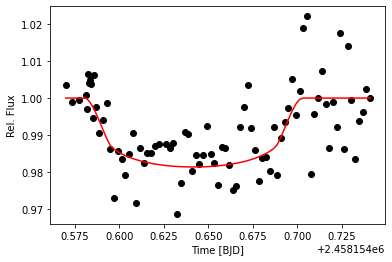

In [10]:
# let's over plot the transit model too
from exotic.api.elca import transit

plt.plot(time, flux/airmasscorr, 'ko')
plt.plot(time, transit(time, result.observations[0].parameters), 'r-')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

In [11]:
# For more information on how to fit a light curve using exotic see: 
# https://github.com/rzellem/EXOTIC/blob/main/exotic/api/elca.py#L602
from exotic.api.elca import lc_fitter

# only define bounds for the "free" parameters during fitting
mybounds = {
    # [lower, upper]
    'rprs':[0,0.2],
    'tmid':[ result.observations[0].parameters['tmid']-0.02,
             result.observations[0].parameters['tmid']+0.02],
    'a2':[-0.1,0.1] # airmass curvature
}

myfit = lc_fitter(time, flux, fluxerr, airmass,
                  result.observations[0].parameters, # priors
                  mybounds, mode='ns' )  # ns = nested sampling, slow but robust + posteriors
                                         # lm = levenberg mardquart, fast but no uncertainties

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+01   [-32.5625..-32.5624]*| it/evals=4640/9169 eff=52.9137% N=400   
[ultranest] Likelihood function evaluations: 9240
[ultranest]   logZ = -39.59 +- 0.1049
[ultranest] Effective samples strategy satisfied (ESS = 1851.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.20, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.10 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.


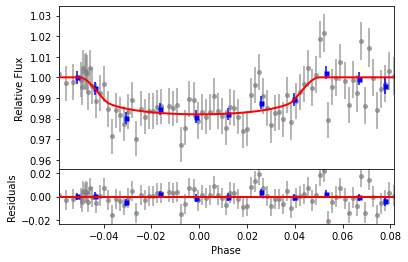

In [12]:
myfit.plot_bestfit()
plt.show()

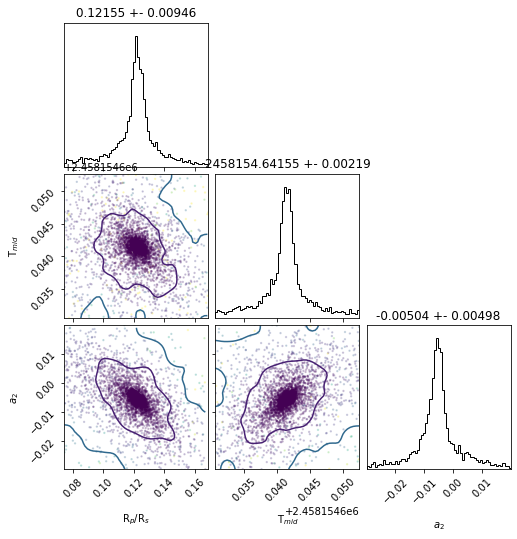

In [13]:
myfit.plot_triangle()
plt.show()

# Exoplanet Ephemeris

After each light curve is fit, the mid-transit times are used along with values from the NASA Exoplanet Archive to derive a new ephemeris

In [14]:
result.ephemeris

{'Tc': 2458154.641735694,
 'Tcs': ['2458154.6416'],
 'files': {'file_oc_pdf': './formats/wasp-33_b/oc_wasp-33_b.pdf',
  'file_oc_png': './formats/wasp-33_b/oc_wasp-33_b.png'},
 'notes': None,
 'Period': 1.2198708522311985,
 'Tc_err': 0.0005085746477986352,
 'epochs': ['-0.0'],
 'Tcs_err': ['0.0021'],
 'datasets': ['0000344'],
 'residuals': ['-0.00013569369912147522'],
 'timesaved': 0.061,
 'Period_err': 1.577331328497329e-07,
 'nea_epochs': ['-4238.0', '-3272.0', '-2170.0', '-1000.0'],
 'nea_references': ['Turner et al. 2016',
  'Zhang et al. 2018\n Collier Cameron et al. 2010 ',
  ' von Essen et al. 2014 ',
  'Johnson et al. 2015'],
 'ephemeris_url': 'https://exoplanets.nasa.gov/watch_results/formats/wasp-33_b/oc_wasp-33_b.png'}

In [15]:
display(Image(url=result.ephemeris['ephemeris_url']))

In [16]:
# TODO list nea_tmids in results file
# result.ephemeris['nea_tmids']